In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


In [5]:
df=pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

In [6]:
df = df.iloc[:,1:]

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


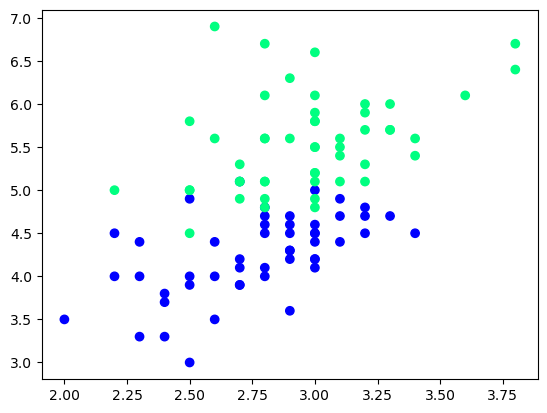

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [13]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)
df_train

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
51,3.2,4.5,1
87,2.3,4.4,1
72,2.5,4.9,1
111,2.7,5.3,2
148,3.4,5.4,2
91,3.0,4.6,1
132,2.8,5.6,2
146,2.5,5.0,2
110,3.2,5.1,2


In [18]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# Bagging

In [19]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
87,2.3,4.4,1
111,2.7,5.3,2
72,2.5,4.9,1
87,2.3,4.4,1
110,3.2,5.1,2
146,2.5,5.0,2
63,2.9,4.7,1
132,2.8,5.6,2


In [20]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

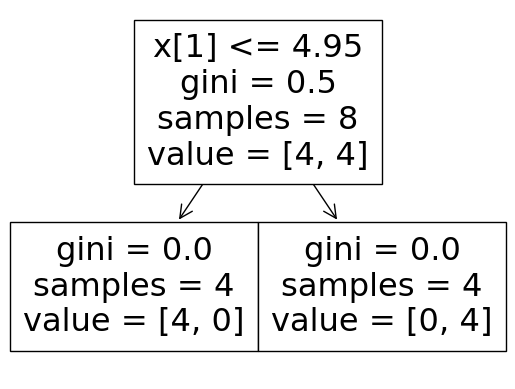

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


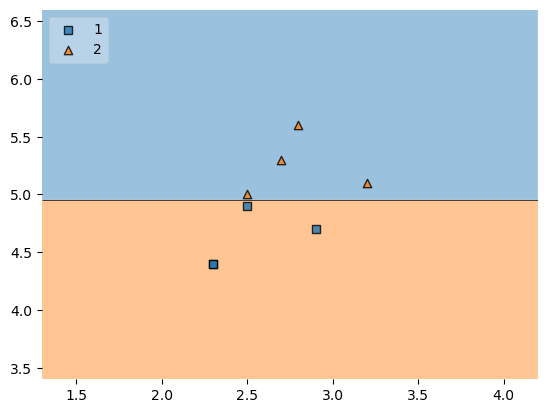

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [22]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
146,2.5,5.0,2
91,3.0,4.6,1
111,2.7,5.3,2
87,2.3,4.4,1
148,3.4,5.4,2
148,3.4,5.4,2
87,2.3,4.4,1
63,2.9,4.7,1


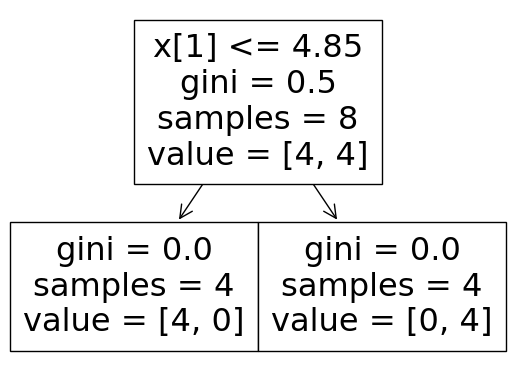

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


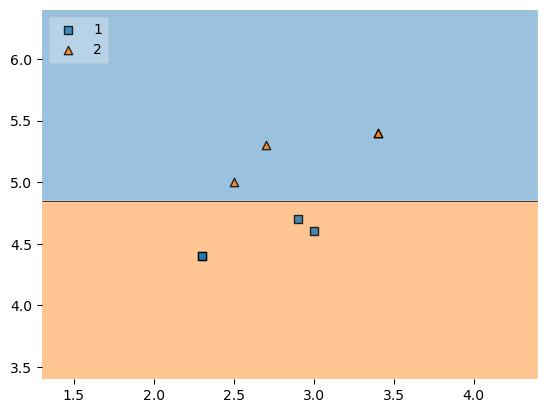

In [23]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [24]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
91,3.0,4.6,1
87,2.3,4.4,1
111,2.7,5.3,2
111,2.7,5.3,2
132,2.8,5.6,2
110,3.2,5.1,2
91,3.0,4.6,1
87,2.3,4.4,1


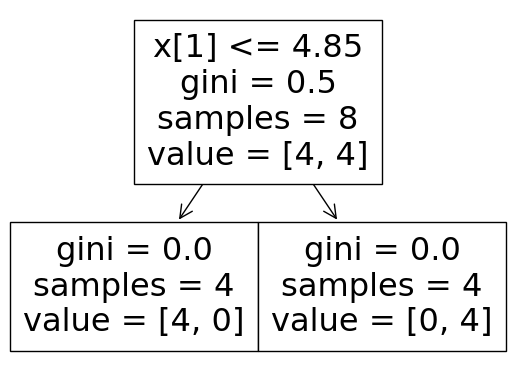

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


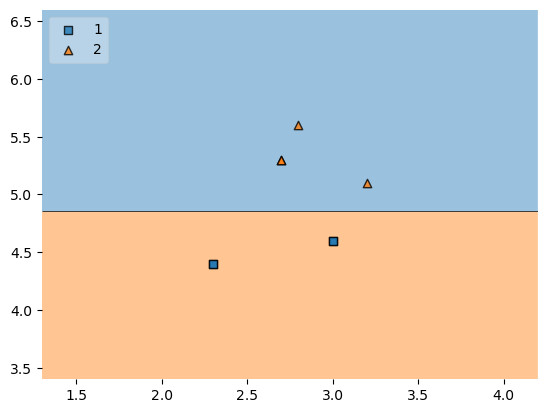

In [25]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict


In [26]:
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
147,3.0,5.2,2
67,2.7,4.1,1
119,2.2,5.0,2
131,3.8,6.4,2


In [27]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [28]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
51,3.2,4.5,1
87,2.3,4.4,1
63,2.9,4.7,1
91,3.0,4.6,1
111,2.7,5.3,2
146,2.5,5.0,2
148,3.4,5.4,2
110,3.2,5.1,2


# Random Subspaces

In [30]:
df1 = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df1 = df1.sample(10)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
47,48,4.6,3.2,1.4,0.2,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
134,135,6.1,2.6,5.6,1.4,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
120,121,6.9,3.2,5.7,2.3,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor


In [33]:
df1.sample(2,replace=True,axis=1)

,PetalWidthCm,SepalWidthCm
47,0.2,3.2
54,1.5,2.8
63,1.4,2.9
134,1.4,2.6
66,1.5,3.0
149,1.8,3.0
9,0.1,3.1
32,0.1,4.1
120,2.3,3.2
55,1.3,2.8


# Random Patches

In [35]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,PetalWidthCm
149,150,1.8
54,55,1.5
9,10,0.1
120,121,2.3
54,55,1.5
120,121,2.3
149,150,1.8
63,64,1.4
